# Plotting Categorical Data

In this section, we will:
- Plot distributions of data across categorical variables
- Plot aggregate/summary statistics across categorical variables


## Plotting Distributions Across Categories

We have seen how to plot distributions of data. Often, the distributions reveal new information when you plot them across categorical variables.

Let's see some examples.

In [19]:
# loading libraries and reading the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn theme if you prefer
sns.set(style="white")

# read data
market_df = pd.read_csv("./global_sales_data/market_fact.csv")
customer_df = pd.read_csv("./global_sales_data/cust_dimen.csv")
product_df = pd.read_csv("./global_sales_data/prod_dimen.csv")
shipping_df = pd.read_csv("./global_sales_data/shipping_dimen.csv")
orders_df = pd.read_csv("./global_sales_data/orders_dimen.csv")


### Boxplots 

We had created simple boxplots such as the ones shown below. Now, let's plot multiple boxplots and see what they can tell us the distribution of variables across categories.

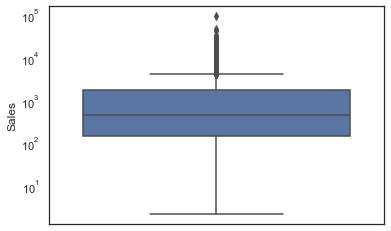

In [20]:
# boxplot of a variable
sns.boxplot(y=market_df['Sales'])
plt.yscale('log')
plt.show()


Now, let's say you want to **compare the (distribution of) sales of various product categories**. Let's first merge the product data into the main dataframe.

In [21]:
# merge the dataframe to add a categorical variable 
df = pd.merge(market_df, product_df, how='inner', on='Prod_id')
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
1,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
2,Ord_5484,Prod_16,SHP_7663,Cust_1820,322.82,0.05,35,-17.58,3.98,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
3,Ord_3730,Prod_16,SHP_5175,Cust_1314,459.08,0.04,34,61.57,3.14,0.60,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
4,Ord_4143,Prod_16,SHP_5771,Cust_1417,207.21,0.06,24,-78.64,6.14,0.59,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"


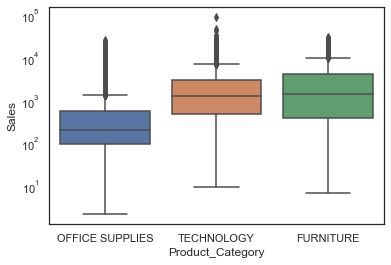

In [22]:
# boxplot of a variable across various product categories
sns.boxplot(x='Product_Category', y='Sales', data=df)
plt.yscale('log')
plt.show()

So this tells you that the sales of office supplies are, on an average, lower than the other two categories. The sales of technology and furniture categories seem much better. Note that each order can have multiple units of products sold, so Sales being higher/lower may be due to price per unit or the number of units.

Let's now plot the other important variable - Profit.

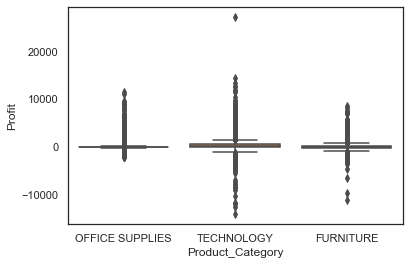

In [23]:
# boxplot of a variable across various product categories
sns.boxplot(x='Product_Category', y='Profit', data=df)
plt.show()

Profit clearly has some *outliers* due to which the boxplots are unreadable. Let's remove some extreme values from Profit (for the purpose of visualisation) and try plotting.

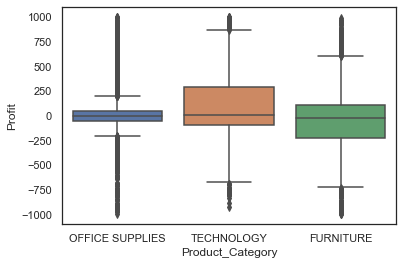

In [24]:
df = df[(df.Profit<1000) & (df.Profit>-1000)]

# boxplot of a variable across various product categories
sns.boxplot(x='Product_Category', y='Profit', data=df)
plt.show()

You can see that though the category 'Technology' has better sales numbers than others, it is also the one where the **most loss making transactions** happen. You can drill further down into this.



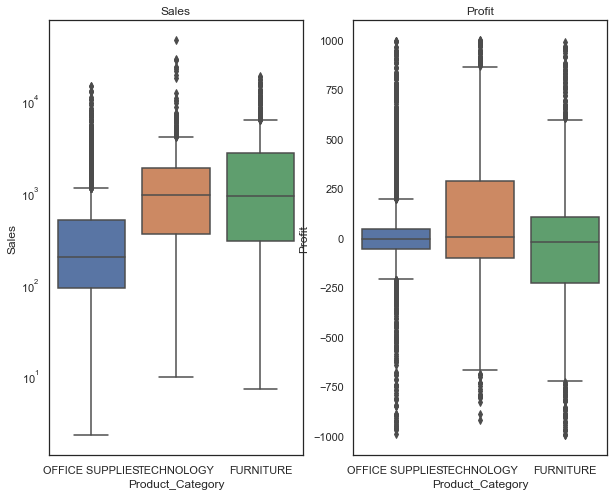

In [25]:
# adjust figure size
plt.figure(figsize=(10, 8))

# subplot 1: Sales
plt.subplot(1, 2, 1)
sns.boxplot(x='Product_Category', y='Sales', data=df)
plt.title("Sales")
plt.yscale('log')

# subplot 2: Profit
plt.subplot(1, 2, 2)
sns.boxplot(x='Product_Category', y='Profit', data=df)
plt.title("Profit")

plt.show()

Now that we've compared Sales and Profits across product categories, let's drill down further and  do the same across **another categorical variable** - Customer_Segment. 

We'll need to add the customer-related attributes (dimensions) to this dataframe.

In [26]:
# merging with customers df
df = pd.merge(df, customer_df, how='inner', on='Cust_id')
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category,Customer_Name,Province,Region,Customer_Segment
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",AARON BERGMAN,ALBERTA,WEST,CORPORATE
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,OFFICE SUPPLIES,PENS & ART SUPPLIES,AARON BERGMAN,ALBERTA,WEST,CORPORATE
2,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,OFFICE SUPPLIES,PAPER,AARON BERGMAN,ALBERTA,WEST,CORPORATE
3,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37,OFFICE SUPPLIES,PAPER,AARON BERGMAN,ALBERTA,WEST,CORPORATE
4,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",AARON HAWKINS,ONTARIO,ONTARIO,HOME OFFICE


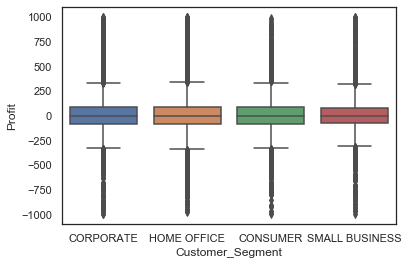

In [27]:
# boxplot of a variable across various product categories
sns.boxplot(x='Customer_Segment', y='Profit', data=df)
plt.show()

You can **visualise the distribution across two categorical variables** using the ```hue= ``` argument.

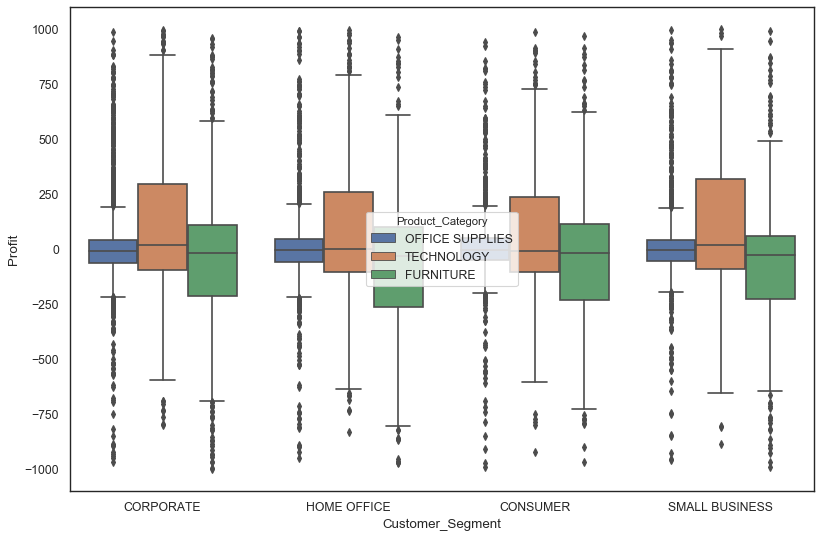

In [29]:
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.boxplot(x='Customer_Segment', y='Profit', hue="Product_Category", data=df)
plt.show()

Across all customer segments, the product category ```Technology``` seems to be doing fairly well, though ```Furniture``` is incurring losses across all segments. 

Now say you are curious to know why certain orders are making huge losses. One of your hypothesis is that the *shipping cost is too high in some orders*. You can **plot derived variables** as well, such as *shipping cost as percentage of sales amount*.  

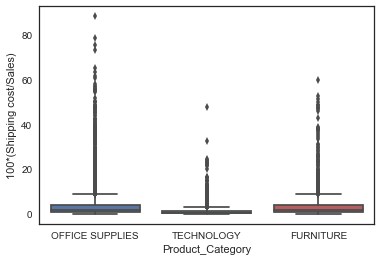

In [11]:
# plot shipping cost as percentage of Sales amount
sns.boxplot(x=df['Product_Category'], y=100*df['Shipping_Cost']/df['Sales'])
plt.ylabel("100*(Shipping cost/Sales)")
plt.show()

## Plotting Aggregated Values across Categories


### Bar Plots - Mean, Median and Count Plots


Bar plots are used to **display aggregated values** of a variable, rather than entire distributions. This is especially useful when you have a lot of data which is difficult to visualise in a single figure. 

For example, say you want to visualise and *compare the average Sales across Product Categories*. The ```sns.barplot()``` function can be used to do that.


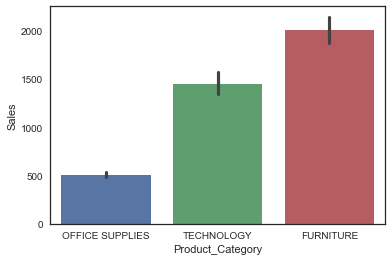

In [12]:
# bar plot with default statistic=mean
sns.barplot(x='Product_Category', y='Sales', data=df)
plt.show()

Note that, **by default, seaborn plots the mean value across categories**, though you can plot the count, median, sum etc. Also, barplot computes and shows the confidence interval of the mean as well.

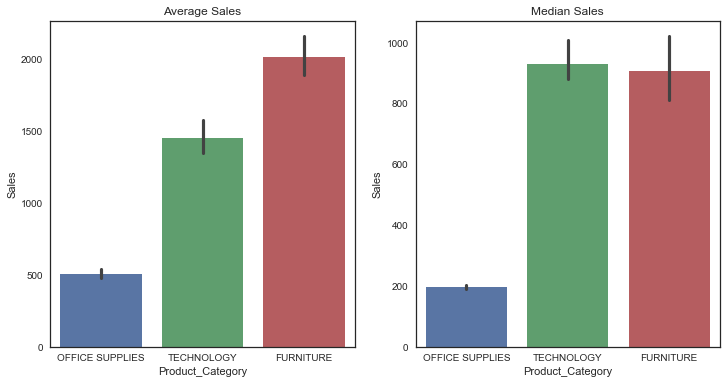

In [13]:
# Create 2 subplots for mean and median respectively

# increase figure size 
plt.figure(figsize=(12, 6))

# subplot 1: statistic=mean
plt.subplot(1, 2, 1)
sns.barplot(x='Product_Category', y='Sales', data=df)
plt.title("Average Sales")

# subplot 2: statistic=median
plt.subplot(1, 2, 2)
sns.barplot(x='Product_Category', y='Sales', data=df, estimator=np.median)
plt.title("Median Sales")

plt.show()


Look at that! The mean and median sales across the product categories tell different stories. This is because of some outliers (extreme values) in the ```Furniture``` category, distorting the value of the mean.


You can add another categorical variable in the plot.

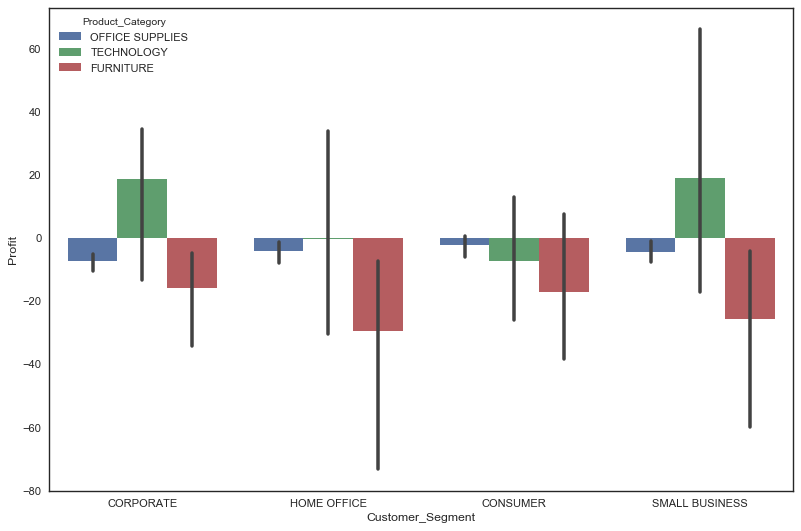

In [14]:
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='Customer_Segment', y='Profit', hue="Product_Category", data=df, estimator=np.median)
plt.show()

The plot neatly shows the median profit across product categories and customer segments. It says that:
- On an average, only Technology products in Small Business and Corporate (customer) categories are profitable.
- Furniture is incurring losses across all Customer Segments


Compare this to the boxplot we had created above - though the bar plots contains 'lesser information' than the boxplot, it is more revealing.

<hr>

When you want to visualise having a large number of categories, it is helpful to plot the categories across the y-axis. Let's now *drill down into product sub categories*. 

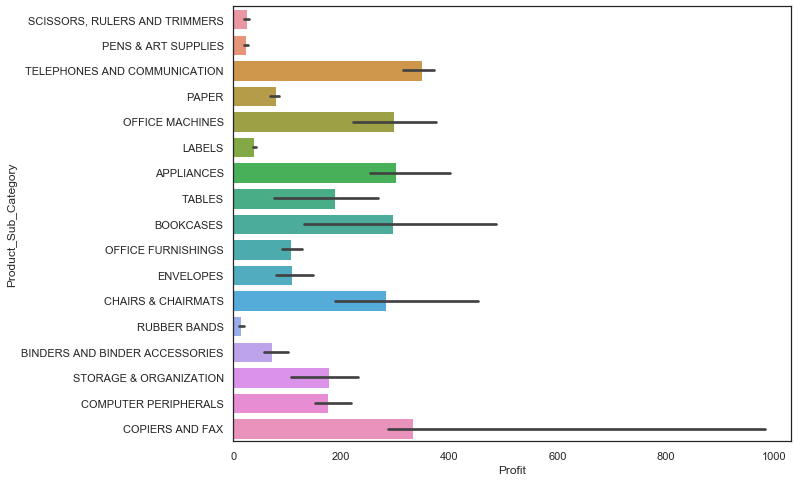

In [16]:
# Plotting categorical variable across the y-axis
plt.figure(figsize=(10, 8))
sns.barplot(x='Profit', y="Product_Sub_Category", data=df, estimator=np.median)
plt.show()

The plot clearly shows which sub categories are incurring the heaviest losses - Copiers and Fax, Tables, Chairs and Chairmats are the most loss making categories. 


You can also plot the **count of the observations** across categorical variables using ```sns.countplot()```.

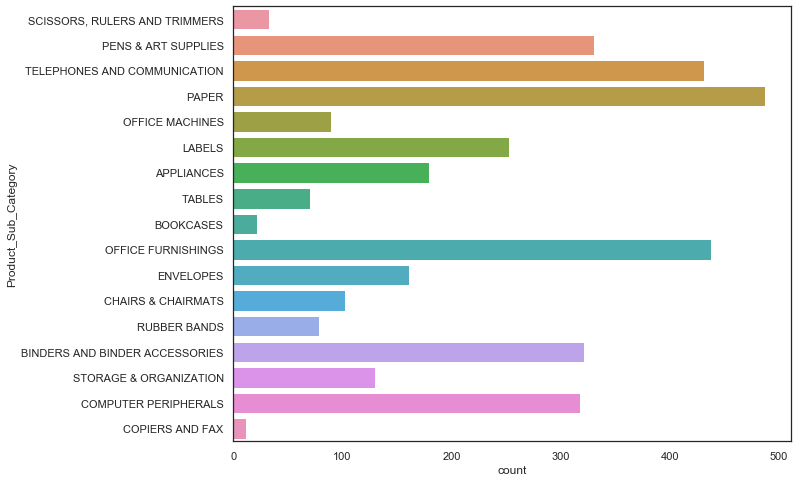

In [17]:
# Plotting count across a categorical variable 
plt.figure(figsize=(10, 8))
sns.countplot(y="Product_Sub_Category", data=df)
plt.show()

Note the most loss making category - Copiers and Fax - has a very few number of orders. 


In the next section, we will see how to plot Time Series data.

## Additional Stuff on Plotting Categorical Variables

1. <a href="https://seaborn.pydata.org/tutorial/categorical.html">Seaborn official tutorial on categorical variables</a>